In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

import joblib

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [5]:
df = pd.read_csv('yeild_data.csv')
df.head()

,State_Name,Crop_Year,Season,Crop,Area,Production,Yeild,Rainfall
0,andaman and nicobar islands,2000,kharif,Arecanut,1254.0,2000.0,1.594896,1244.2
1,andaman and nicobar islands,2000,kharif,Rice,102.0,321.0,3.147059,1244.2
2,andaman and nicobar islands,2000,whole year,Banana,176.0,641.0,3.642045,2763.2
3,andaman and nicobar islands,2000,whole year,Cashewnut,720.0,165.0,0.229167,2763.2
4,andaman and nicobar islands,2000,whole year,Coconut,18168.0,65100000.0,3583.223250,2763.2


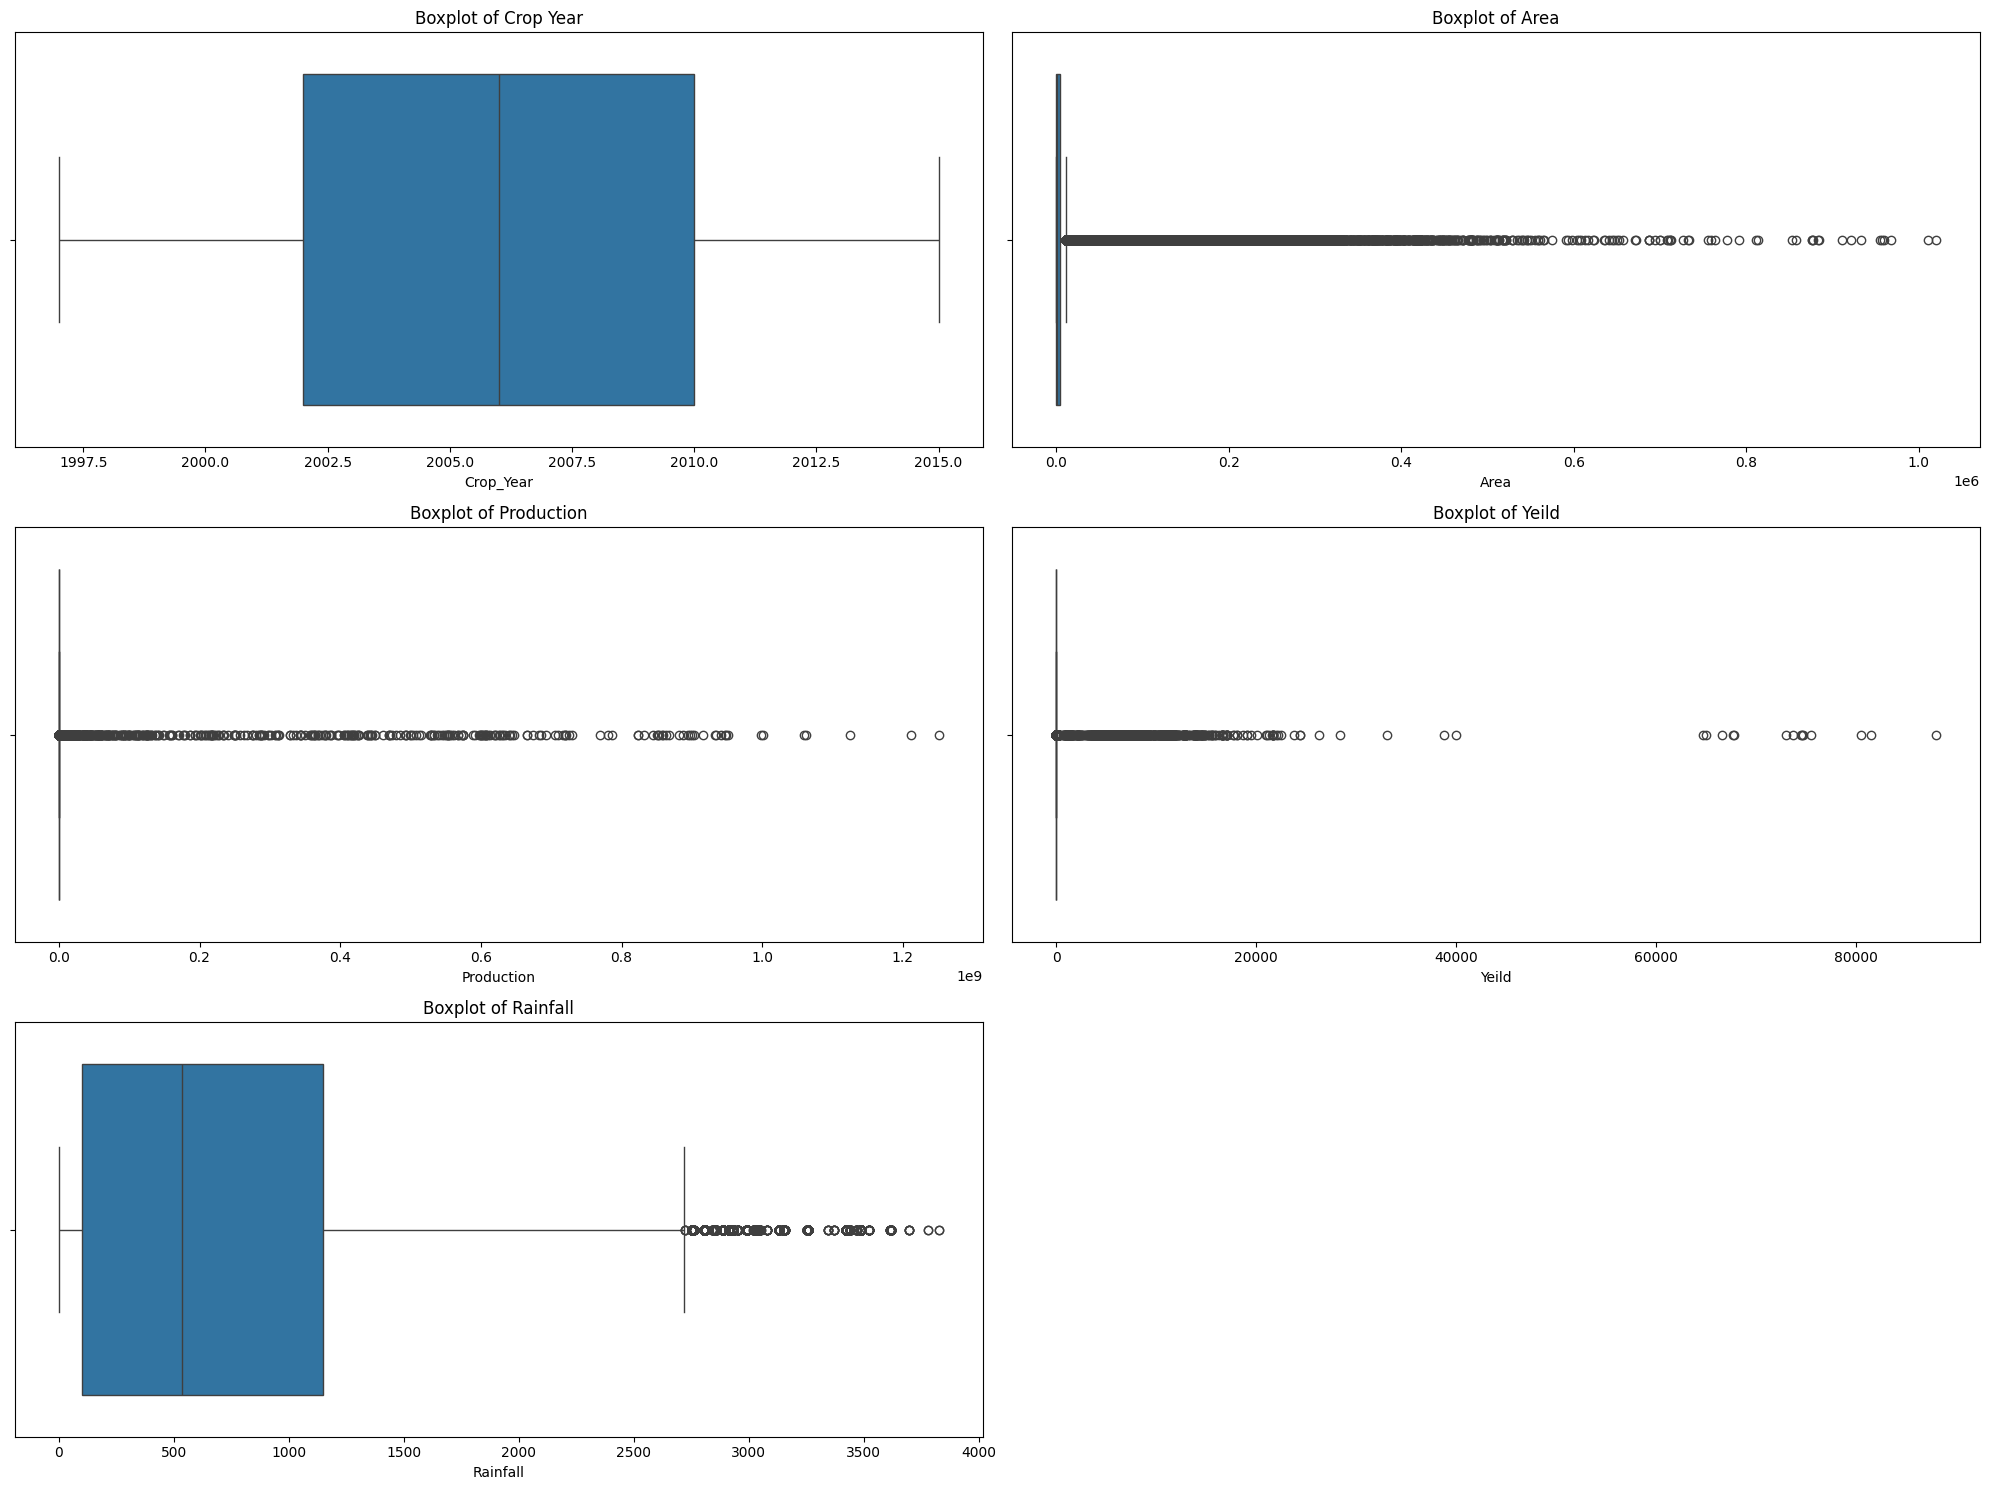

In [6]:

fig, axs = plt.subplots(3, 2, figsize=(20, 15))


sns.boxplot(x=df['Crop_Year'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Crop Year')

sns.boxplot(x=df['Area'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Area')



sns.boxplot(x=df['Production'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Production')


sns.boxplot(x=df['Yeild'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of Yeild')



sns.boxplot(x=df['Rainfall'], ax=axs[2, 0])
axs[2, 0].set_title('Boxplot of Rainfall')


fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()

In [7]:
df[df['Production']==0.0]

,State_Name,Crop_Year,Season,Crop,Area,Production,Yeild,Rainfall
375,andhra pradesh,2002,kharif,Soyabean,51.0,0.0,0.0,358.30
402,andhra pradesh,2002,whole year,Cucumber,18.0,0.0,0.0,659.20
454,andhra pradesh,2003,whole year,Cucumber,51.0,0.0,0.0,911.15
1146,andhra pradesh,2002,whole year,Cabbage,4.0,0.0,0.0,659.20
1151,andhra pradesh,2002,whole year,Cucumber,8.0,0.0,0.0,659.20
...,...,...,...,...,...,...,...,...
207975,uttar pradesh,2003,rabi,Linseed,1.0,0.0,0.0,16.00
209270,uttar pradesh,2002,kharif,Moong(Green Gram),1.0,0.0,0.0,560.05
211061,uttar pradesh,2002,kharif,Moong(Green Gram),1.0,0.0,0.0,560.05
213907,uttar pradesh,2003,rabi,Linseed,1.0,0.0,0.0,16.00


In [8]:
df.drop(df[df['Production']==0.0].index, inplace=True)

<Axes: xlabel='Production'>

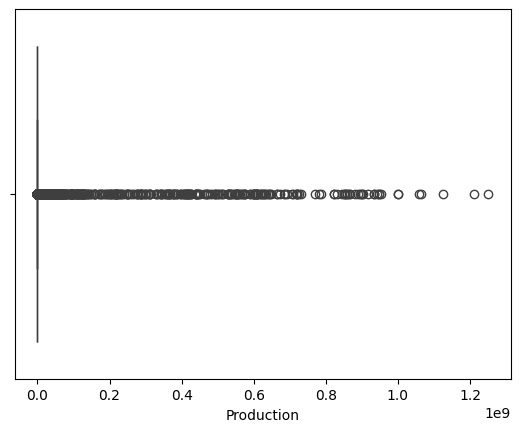

In [9]:
sns.boxplot(x=df['Production'])

In [10]:
df.shape

(228806, 8)

In [11]:
df['State_Name'].nunique()

31

In [12]:
df['Crop'].nunique()

94

In [13]:
df['Season'].nunique()

6

In [14]:
df=pd.get_dummies(df, columns=['Season', 'State_Name'], drop_first=True)

In [15]:
crop_means = df.groupby('Crop')['Production'].mean().to_dict()

In [16]:
crop_means

{'Arcanut (Processed)': 9641.55,
 'Arecanut': 13332.596107470512,
 'Arhar/Tur': 5284.490164000537,
 'Atcanut (Raw)': 46362.5,
 'Bajra': 24275.169599400975,
 'Banana': 47928.12594878529,
 'Barley': 5418.898214811183,
 'Bean': 312.0,
 'Beans & Mutter(Vegetable)': 2072.1470588235293,
 'Bhindi': 2710.059829059829,
 'Bitter Gourd': 35.3,
 'Black pepper': 2004.642033707865,
 'Blackgram': 443.82828282828285,
 'Bottle Gourd': 54.36363636363637,
 'Brinjal': 5737.952,
 'Cabbage': 3210.505154639175,
 'Cardamom': 487.90539772727277,
 'Carrot': 214.0,
 'Cashewnut': 2516.6620310981534,
 'Cashewnut Processed': 427.42105263157896,
 'Cashewnut Raw': 2813.2,
 'Castor seed': 4894.7709880331395,
 'Cauliflower': 1024.0555555555557,
 'Citrus Fruit': 4886.483333333334,
 'Coconut ': 68536421.4321999,
 'Coffee': 21668.666666666668,
 'Colocosia': 4530.909090909091,
 'Coriander': 1137.5629263859437,
 'Cotton(lint)': 68795.02564280751,
 'Cowpea(Lobia)': 441.5376146788991,
 'Drum Stick': 1329.6724137931035,
 'Dry 

In [17]:
df['Crop_Encoded'] = df['Crop'].map(crop_means)
df.head()

,Crop_Year,Crop,Area,Production,Yeild,Rainfall,Season_kharif,Season_rabi,Season_summer,Season_whole year,...,State_Name_punjab,State_Name_rajasthan,State_Name_sikkim,State_Name_tamil nadu,State_Name_telangana,State_Name_tripura,State_Name_uttar pradesh,State_Name_uttarakhand,State_Name_west bengal,Crop_Encoded
0,2000,Arecanut,1254.0,2000.0,1.594896,1244.2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1.333260e+04
1,2000,Rice,102.0,321.0,3.147059,1244.2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1.074007e+05
2,2000,Banana,176.0,641.0,3.642045,2763.2,False,False,False,True,...,False,False,False,False,False,False,False,False,False,4.792813e+04
3,2000,Cashewnut,720.0,165.0,0.229167,2763.2,False,False,False,True,...,False,False,False,False,False,False,False,False,False,2.516662e+03
4,2000,Coconut,18168.0,65100000.0,3583.223250,2763.2,False,False,False,True,...,False,False,False,False,False,False,False,False,False,6.853642e+07


In [18]:
df.head()

,Crop_Year,Crop,Area,Production,Yeild,Rainfall,Season_kharif,Season_rabi,Season_summer,Season_whole year,...,State_Name_punjab,State_Name_rajasthan,State_Name_sikkim,State_Name_tamil nadu,State_Name_telangana,State_Name_tripura,State_Name_uttar pradesh,State_Name_uttarakhand,State_Name_west bengal,Crop_Encoded
0,2000,Arecanut,1254.0,2000.0,1.594896,1244.2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1.333260e+04
1,2000,Rice,102.0,321.0,3.147059,1244.2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1.074007e+05
2,2000,Banana,176.0,641.0,3.642045,2763.2,False,False,False,True,...,False,False,False,False,False,False,False,False,False,4.792813e+04
3,2000,Cashewnut,720.0,165.0,0.229167,2763.2,False,False,False,True,...,False,False,False,False,False,False,False,False,False,2.516662e+03
4,2000,Coconut,18168.0,65100000.0,3583.223250,2763.2,False,False,False,True,...,False,False,False,False,False,False,False,False,False,6.853642e+07


In [19]:
df.drop('Crop', axis=1, inplace=True)

In [20]:
df.head()

,Crop_Year,Area,Production,Yeild,Rainfall,Season_kharif,Season_rabi,Season_summer,Season_whole year,Season_winter,...,State_Name_punjab,State_Name_rajasthan,State_Name_sikkim,State_Name_tamil nadu,State_Name_telangana,State_Name_tripura,State_Name_uttar pradesh,State_Name_uttarakhand,State_Name_west bengal,Crop_Encoded
0,2000,1254.0,2000.0,1.594896,1244.2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.333260e+04
1,2000,102.0,321.0,3.147059,1244.2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.074007e+05
2,2000,176.0,641.0,3.642045,2763.2,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,4.792813e+04
3,2000,720.0,165.0,0.229167,2763.2,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2.516662e+03
4,2000,18168.0,65100000.0,3583.223250,2763.2,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,6.853642e+07


In [21]:
X=df.drop(columns=['Production', 'Yeild','Crop_Year'])
y=df['Yeild']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

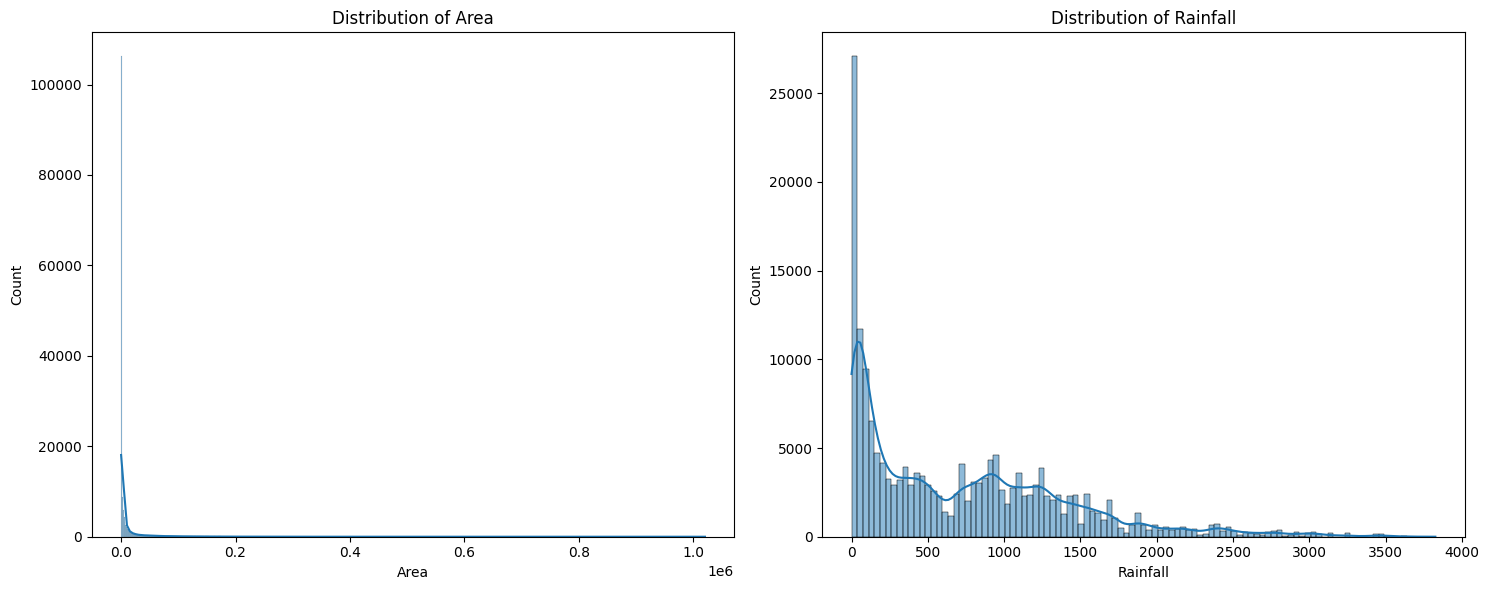

In [23]:

fig, axs = plt.subplots(1, 2, figsize=(15, 6))


sns.histplot(x=X_train['Area'], ax=axs[0], kde=True)
axs[0].set_title('Distribution of Area')


sns.histplot(x=X_train['Rainfall'], ax=axs[1], kde=True)
axs[1].set_title('Distribution of Rainfall')

plt.tight_layout()
plt.show()

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('rainfall_yeo', PowerTransformer(method='yeo-johnson', standardize=True), ['Rainfall'])
    ],
    remainder='passthrough'
)

In [25]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

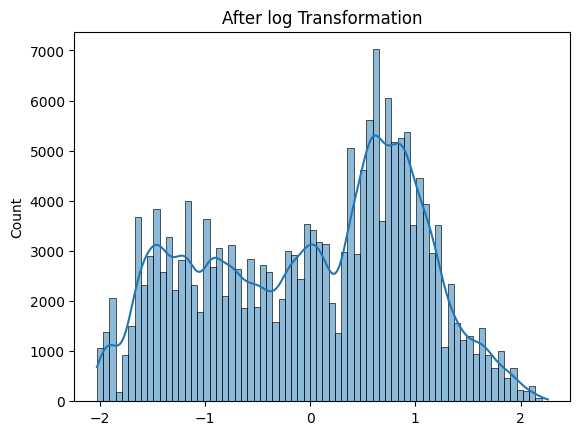

In [26]:
sns.histplot(x=X_train_transformed[:, 0], kde=True)
plt.title("After log Transformation")
plt.show()

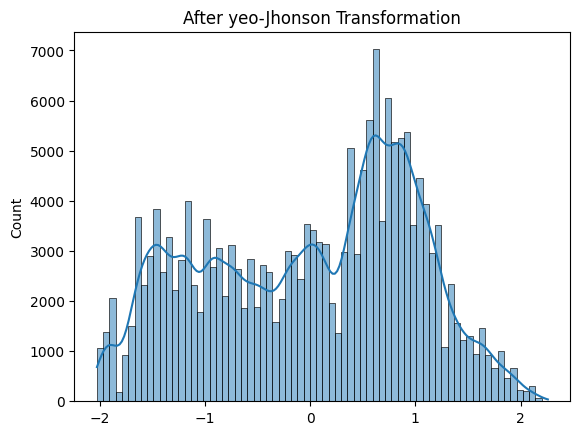

In [27]:
sns.histplot(x=X_train_transformed[:, 0], kde=True)
plt.title("After yeo-Jhonson Transformation")
plt.show()

In [28]:
xgb_model = xgb.XGBRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)

print("Training XGBoost Model...")
xgb_model.fit(X_train_transformed, y_train)
print("Training Complete!")

y_train_pred = xgb_model.predict(X_train_transformed)
y_test_pred = xgb_model.predict(X_test_transformed)

def evaluate_model(y_true, y_pred, set_name="Test"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"--- {set_name} Set Performance ---")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("-" * 30)

evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")

Training XGBoost Model...
Training Complete!
--- Train Set Performance ---
MAE:  17.9692
RMSE: 256.2169
R2 Score: 0.9087
------------------------------
--- Test Set Performance ---
MAE:  16.9830
RMSE: 230.2500
R2 Score: 0.8902
------------------------------


In [29]:
import pandas as pd
import numpy as np

def predict_crop_yield(model, preprocessor, crop_means, train_columns,
                       state, season, crop, area, rainfall):

    # 1. Create template DataFrame (all zeros)
    input_data = pd.DataFrame(0, index=[0], columns=train_columns)

    # 2. Fill Numeric Columns (No Crop_Year)
    input_data['Area'] = area
    input_data['Rainfall'] = rainfall

    # 3. Handle Target Encoding for 'Crop'
    global_mean_yield = sum(crop_means.values()) / len(crop_means)
    input_data['Crop_Encoded'] = crop_means.get(crop, global_mean_yield)

    # 4. Handle One-Hot Encoding
    state_col = f"State_Name_{state}"
    season_col = f"Season_{season}"

    if state_col in input_data.columns:
        input_data[state_col] = 1

    if season_col in input_data.columns:
        input_data[season_col] = 1

    # 5. Transform
    try:
        input_transformed = preprocessor.transform(input_data)
    except ValueError:
        print("Warning: Column match issue, reordering...")
        input_transformed = preprocessor.transform(input_data[train_columns])

    # 6. Predict
    prediction = model.predict(input_transformed)

    return prediction[0]

In [30]:
my_prediction = predict_crop_yield(
    model=xgb_model,
    preprocessor=preprocessor,
    crop_means=crop_means,
    train_columns=X_train.columns.tolist(),
    state='andaman and nicobar islands',
    season='kharif',
    crop='Arecanut',
    area=1254,
    rainfall=1244.2
)

print(f"Predicted Yield: {my_prediction:.2f}")

Predicted Yield: 1.57


importance of the features

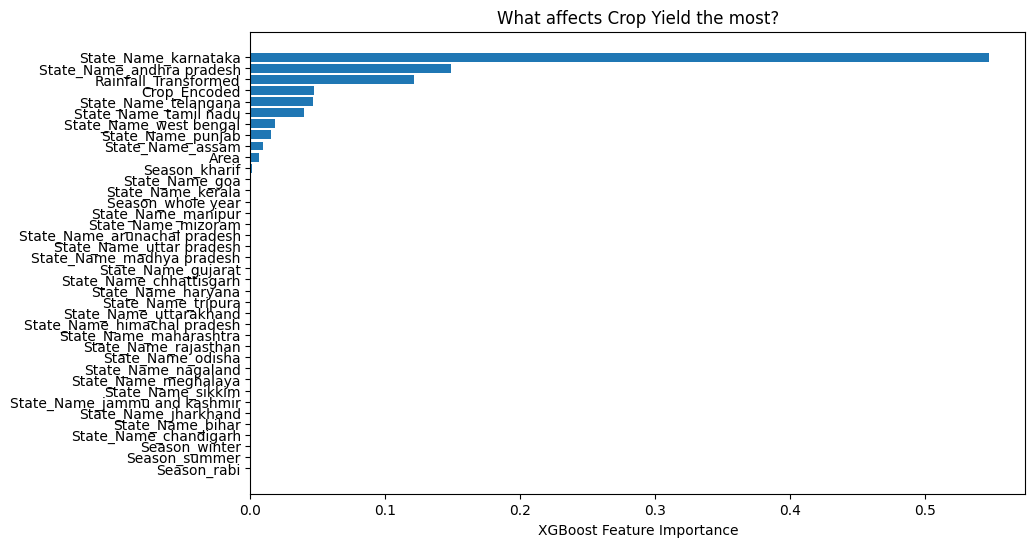

In [31]:
feature_names = (

    ['Rainfall_Transformed'] +
    [col for col in X_train.columns if col != 'Rainfall']
)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
# XGBoost has a built-in plot_importance function, but barh is often cleaner
sorted_idx = xgb_model.feature_importances_.argsort()
plt.barh([feature_names[i] for i in sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.title("What affects Crop Yield the most?")
plt.show()

In [32]:
artifacts = {
    "model": xgb_model,
    "preprocessor": preprocessor,
    "crop_means": crop_means,
    "train_columns": X_train.columns.tolist()
}


joblib.dump(artifacts, "crop_yield_pipeline.joblib")


xgb_model.save_model("yield_model_xgb.json")

print("Pipeline saved as 'crop_yield_pipeline.joblib'")

Pipeline saved as 'crop_yield_pipeline.joblib'
